In [246]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/conradhalle/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [247]:
df = pd.read_csv("answerList_data.csv")

In [248]:
df.head()

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Code.complexity,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage
0,261,HIT01_8,0,90.984,4,2,0,0,1,0,...,1,832cg-7G1i-462:73eI-8E-2g-985,5,Undergraduate_Student,7.0,21,Male,High School,United States,Java; C++; C#
1,262,HIT01_8,0,133.711,5,1,0,0,1,0,...,1,98ce7A-4i-507,4,Undergraduate_Student,10.0,25,Female,High School;University;Web,United States,c#
2,263,HIT01_8,0,77.696,5,2,0,0,1,0,...,1,881AC0I2E-625:135cI3E-7e8-86,5,Professional_Developer,7.0,24,Male,High School;University;Web,United States,C++;Java;PHP
3,264,HIT01_8,0,46.644,1,1,0,0,1,0,...,1,270eG-5c6A3-46:65eI-2i-2I-9-36,5,Professional_Developer,20.0,38,Male,High School;University;Other On the job,USA,C#
4,265,HIT01_8,0,215.416,5,5,0,0,1,0,...,1,844Cg1g5e1-17:255ei-8G8E85-8,3,Undergraduate_Student,5.0,19,Male,High School;University;Web,United States,C++; Java


In [249]:
df.columns

Index(['Answer.ID', 'FailingMethod', 'Question.ID', 'Answer.duration',
       'Answer.confidence', 'Answer.difficulty', 'GroundTruth', 'TP', 'TN',
       'FN', 'FP', 'Answer.option', 'Answer.order', 'Answer.explanation',
       'Code.LOC', 'Code.complexity', 'Worker.ID', 'Worker.score',
       'Worker.profession', 'Worker.yearsOfExperience', 'Worker.age',
       'Worker.gender', 'Worker.whereLearnedToCode', 'Worker.country',
       'Worker.programmingLanguage'],
      dtype='object')

In [250]:
df.shape

(2580, 25)

## Complexity Score
- TTR: how many unique words are used, affected by length (number of types/number of tokens)
- Halstead volume: for code

In [251]:
explanations = list(df["Answer.explanation"])
explanations = [str(e) for e in explanations]
scores = [len(list(set(word_tokenize(e)))) / len(word_tokenize(e)) for e in explanations]

In [252]:
df.loc[:, "TTR"] = scores

In [253]:
!pip install py-readability-metrics

In [254]:
from readability import Readability
scores = [Readability(e*10).flesch_kincaid().score for e in explanations]
df.loc[:, "FK"] = scores

# r.flesch_kincaid()
# r.flesch()
# r.gunning_fog()
# r.coleman_liau()
# r.dale_chall()
# r.ari()
# r.linsear_write()
# r.smog()
# r.spache()

In [255]:
df.head()

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,TTR,FK
0,261,HIT01_8,0,90.984,4,2,0,0,1,0,...,5,Undergraduate_Student,7.0,21,Male,High School,United States,Java; C++; C#,0.888889,9.162787
1,262,HIT01_8,0,133.711,5,1,0,0,1,0,...,4,Undergraduate_Student,10.0,25,Female,High School;University;Web,United States,c#,0.923077,49.683130
2,263,HIT01_8,0,77.696,5,2,0,0,1,0,...,5,Professional_Developer,7.0,24,Male,High School;University;Web,United States,C++;Java;PHP,0.777778,115.686346
3,264,HIT01_8,0,46.644,1,1,0,0,1,0,...,5,Professional_Developer,20.0,38,Male,High School;University;Other On the job,USA,C#,1.000000,45.104851
4,265,HIT01_8,0,215.416,5,5,0,0,1,0,...,3,Undergraduate_Student,5.0,19,Male,High School;University;Web,United States,C++; Java,0.947368,64.645901


In [256]:
df["explanation.size"] = df["Answer.explanation"].apply(lambda a: len(word_tokenize(str(a))))

In [257]:
features = [ "GroundTruth", "FailingMethod", 'Answer.duration','Answer.confidence', 'Answer.difficulty','Answer.option', 'Answer.order',
       'Worker.score', 'Code.LOC', 'Code.complexity', 
       'Worker.profession', 'Worker.yearsOfExperience', 'Worker.age',
       'Worker.gender', 'Worker.whereLearnedToCode', 'Worker.country',
       'Worker.programmingLanguage', 'TTR', 'explanation.size', 'FK']

In [258]:
filtered_data = df.loc[:, features]
filtered_data["Worker.whereLearnedToCode"] = filtered_data["Worker.whereLearnedToCode"].apply(lambda a: a.split(";"))
filtered_data

,GroundTruth,FailingMethod,Answer.duration,Answer.confidence,Answer.difficulty,Answer.option,Answer.order,Worker.score,Code.LOC,Code.complexity,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,TTR,explanation.size,FK
0,0,HIT01_8,90.984,4,2,NO,3,5,1,1,Undergraduate_Student,7.0,21,Male,[High School],United States,Java; C++; C#,0.888889,18,9.162787
1,0,HIT01_8,133.711,5,1,NO,3,4,1,1,Undergraduate_Student,10.0,25,Female,"[High School, University, Web]",United States,c#,0.923077,13,49.683130
2,0,HIT01_8,77.696,5,2,NO,3,5,1,1,Professional_Developer,7.0,24,Male,"[High School, University, Web]",United States,C++;Java;PHP,0.777778,36,115.686346
3,0,HIT01_8,46.644,1,1,NO,3,5,1,1,Professional_Developer,20.0,38,Male,"[High School, University, Other On the job]",USA,C#,1.000000,12,45.104851
4,0,HIT01_8,215.416,5,5,NO,3,3,1,1,Undergraduate_Student,5.0,19,Male,"[High School, University, Web]",United States,C++; Java,0.947368,19,64.645901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,HIT08_54,220.420,2,4,NO,1,3,1,1,Graduate_Student,2.0,28,Male,[University],USA,C#,0.800000,35,119.653750
2576,0,HIT08_54,322.790,4,3,YES,1,5,1,1,Professional_Developer,17.0,39,Male,"[University, Web]",USA,C#; VB.NET; Java,0.900000,30,10.361486
2577,0,HIT08_54,159.530,5,1,NO,1,4,1,1,Professional_Developer,10.0,31,Male,"[High School, University, Web, Other work]",usa,C++,1.000000,11,35.847143
2578,0,HIT08_54,68.578,5,1,NO,1,4,1,1,Undergraduate_Student,4.0,19,Male,"[University, Web, Other FIRST Robotics]",United States,C++,1.000000,10,39.866923


In [259]:
# create a list with all individual values contained in the arrays of the whereLearnedToCode column
all_values = []
for v in filtered_data["Worker.whereLearnedToCode"]:
    all_values.extend(v)
all_values = list(set(all_values))
print(all_values)

['Other Java while on the job', 'Other Instructional books', 'Other Self Study', 'Other Leanred more experts at work', 'Other autodidact', 'Other Middle school', 'Other FIRST Robotics', ' no?', 'Other private institute', 'Other Professional', 'Other MOOC', 'Other work', 'University', 'Other Self taught', 'Other Taught myself the basics as a kid', 'Other Training classes', 'Other on the job', 'Other had a book on BASIC when I was a kid', 'Other On the job', 'Other found a book', 'Other Through work', 'Other US Army', 'Other private', 'Web', 'High School', 'Other Employer', 'Other Hobby', 'Other elementary school', 'Other Professionally', 'Other Self-study', 'Other na', 'Other books', 'Other Books', 'Other i really dont remember a time when i couldnt', ' books', 'Other self study', 'Other at work', 'Other self taught', 'Other Diploma', 'Other Self Help Books', 'Other When I started programming (At age 9)', 'Other Summer Camp', 'Other self-taught', 'Other Hobbyist', ' there was no "intern

In [260]:
# asked chatGPT to provide a mapping:
coding_learning_mapping = {
    "Self-taught": [
        "Other self taught", "Other Self-study", "Other autodidact", "Other self-taught", 
        "Other self study", "Other books", "Other found a book", 
        "Other had a book on BASIC when I was a kid", "Other by myself from books", 
        "Other Taught myself the basics as a kid", "Other Instructional books", 
        "Other Self Help Books", "Other private institute", "Other private", 
        "Other Self Taught", "Other Self Study", "Other Hobbyist", "Other books", 
        "Other as long as i can remember honestly", "Other i really dont remember a time when i couldnt", "Other Self-taught as a child", "Other Self taught"
    ],
    "Web":["Web"],
    "University": ["University"],
    "High School": ["High School"],
    "Middle School": ["Middle school", "Other junior high computer class", "Other Middle school"],
    "Elementary School": ["Other elementary school"],
    "Diploma or Certification": ["Other Diploma"],
    "Workplace Learning": [
        "Other at work", "Other on the job", "Other Through work", 
        "Other Employer", "Other Professionally", "Other Java while on the job", 
        "Other Work", "Other Leanred more experts at work", "Other US Army", "Other On the job", "Other work","Other Professional"
    ],
    "MOOCs and Online Resources": [
        "Other MOOC", "Other Training classes", "Other Private Institute"
    ],
    "Books and Paper Resources": [
        "Other books", "Other Instructional books", "Other found a book", 
        "Other had a book on BASIC when I was a kid", " there was no 'internet'. I had a TRS-80 for gosh sake. We learned from books! Made of paper. Odd concept", "Other Books", " books", " there was no \"internet\". I had a TRS-80 for gosh sake. We learned from books! Made of paper. Odd concept"
    ],
    "Extracurricular Activities": [
        "Other FIRST Robotics", "Other Summer Camp", "Other Hobby"
    ],
    "Unknown/Other": [
        "Other na", "Other", " no?", "Other forever", "Other When I started programming (At age 9)"
    ]
}

def build_reverse_mapping(mapping):
    reverse_mapping = {}
    for category, labels in mapping.items():
        if isinstance(labels, dict):  # Handle nested structure
            for subcategory, sublabels in labels.items():
                for label in sublabels:
                    reverse_mapping[label] = f"{category} > {subcategory}"
        else:
            for label in labels:
                reverse_mapping[label] = category
    return reverse_mapping

reversed_mapping = build_reverse_mapping(coding_learning_mapping)

def map_column_values(values):
    return [reversed_mapping.get(value) for value in values]

filtered_data["Worker.whereLearnedToCode"] = filtered_data["Worker.whereLearnedToCode"].apply(map_column_values)
filtered_data

,GroundTruth,FailingMethod,Answer.duration,Answer.confidence,Answer.difficulty,Answer.option,Answer.order,Worker.score,Code.LOC,Code.complexity,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,TTR,explanation.size,FK
0,0,HIT01_8,90.984,4,2,NO,3,5,1,1,Undergraduate_Student,7.0,21,Male,[High School],United States,Java; C++; C#,0.888889,18,9.162787
1,0,HIT01_8,133.711,5,1,NO,3,4,1,1,Undergraduate_Student,10.0,25,Female,"[High School, University, Web]",United States,c#,0.923077,13,49.683130
2,0,HIT01_8,77.696,5,2,NO,3,5,1,1,Professional_Developer,7.0,24,Male,"[High School, University, Web]",United States,C++;Java;PHP,0.777778,36,115.686346
3,0,HIT01_8,46.644,1,1,NO,3,5,1,1,Professional_Developer,20.0,38,Male,"[High School, University, Workplace Learning]",USA,C#,1.000000,12,45.104851
4,0,HIT01_8,215.416,5,5,NO,3,3,1,1,Undergraduate_Student,5.0,19,Male,"[High School, University, Web]",United States,C++; Java,0.947368,19,64.645901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,HIT08_54,220.420,2,4,NO,1,3,1,1,Graduate_Student,2.0,28,Male,[University],USA,C#,0.800000,35,119.653750
2576,0,HIT08_54,322.790,4,3,YES,1,5,1,1,Professional_Developer,17.0,39,Male,"[University, Web]",USA,C#; VB.NET; Java,0.900000,30,10.361486
2577,0,HIT08_54,159.530,5,1,NO,1,4,1,1,Professional_Developer,10.0,31,Male,"[High School, University, Web, Workplace Learn...",usa,C++,1.000000,11,35.847143
2578,0,HIT08_54,68.578,5,1,NO,1,4,1,1,Undergraduate_Student,4.0,19,Male,"[University, Web, Extracurricular Activities]",United States,C++,1.000000,10,39.866923


In [261]:
mlb = MultiLabelBinarizer()
whereLearnedToCodeVector = mlb.fit_transform(filtered_data.loc[:, "Worker.whereLearnedToCode"])
whereLearnedToCodeVector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], shape=(2580, 12))

In [262]:
mlb.classes_

array(['Books and Paper Resources', 'Diploma or Certification',
       'Elementary School', 'Extracurricular Activities', 'High School',
       'MOOCs and Online Resources', 'Middle School', 'Self-taught',
       'University', 'Unknown/Other', 'Web', 'Workplace Learning'],
      dtype=object)

In [263]:
whereLearnedToCodeDf = pd.DataFrame(whereLearnedToCodeVector, columns=mlb.classes_)
data = pd.concat([filtered_data, whereLearnedToCodeDf], axis=1)

In [264]:
data

,GroundTruth,FailingMethod,Answer.duration,Answer.confidence,Answer.difficulty,Answer.option,Answer.order,Worker.score,Code.LOC,Code.complexity,...,Elementary School,Extracurricular Activities,High School,MOOCs and Online Resources,Middle School,Self-taught,University,Unknown/Other,Web,Workplace Learning
0,0,HIT01_8,90.984,4,2,NO,3,5,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,HIT01_8,133.711,5,1,NO,3,4,1,1,...,0,0,1,0,0,0,1,0,1,0
2,0,HIT01_8,77.696,5,2,NO,3,5,1,1,...,0,0,1,0,0,0,1,0,1,0
3,0,HIT01_8,46.644,1,1,NO,3,5,1,1,...,0,0,1,0,0,0,1,0,0,1
4,0,HIT01_8,215.416,5,5,NO,3,3,1,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,HIT08_54,220.420,2,4,NO,1,3,1,1,...,0,0,0,0,0,0,1,0,0,0
2576,0,HIT08_54,322.790,4,3,YES,1,5,1,1,...,0,0,0,0,0,0,1,0,1,0
2577,0,HIT08_54,159.530,5,1,NO,1,4,1,1,...,0,0,1,0,0,0,1,0,1,1
2578,0,HIT08_54,68.578,5,1,NO,1,4,1,1,...,0,1,0,0,0,0,1,0,1,0


In [265]:
data["Worker.programmingLanguage"]

0          Java; C++; C#
1                     c#
2           C++;Java;PHP
3                     C#
4              C++; Java
              ...       
2575                  C#
2576    C#; VB.NET; Java
2577                 C++
2578                 C++
2579                Java
Name: Worker.programmingLanguage, Length: 2580, dtype: object

In [266]:
data["Worker.programmingLanguage"] = data["Worker.programmingLanguage"].apply(lambda a: str(a).split(";"))
data

,GroundTruth,FailingMethod,Answer.duration,Answer.confidence,Answer.difficulty,Answer.option,Answer.order,Worker.score,Code.LOC,Code.complexity,...,Elementary School,Extracurricular Activities,High School,MOOCs and Online Resources,Middle School,Self-taught,University,Unknown/Other,Web,Workplace Learning
0,0,HIT01_8,90.984,4,2,NO,3,5,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,HIT01_8,133.711,5,1,NO,3,4,1,1,...,0,0,1,0,0,0,1,0,1,0
2,0,HIT01_8,77.696,5,2,NO,3,5,1,1,...,0,0,1,0,0,0,1,0,1,0
3,0,HIT01_8,46.644,1,1,NO,3,5,1,1,...,0,0,1,0,0,0,1,0,0,1
4,0,HIT01_8,215.416,5,5,NO,3,3,1,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,HIT08_54,220.420,2,4,NO,1,3,1,1,...,0,0,0,0,0,0,1,0,0,0
2576,0,HIT08_54,322.790,4,3,YES,1,5,1,1,...,0,0,0,0,0,0,1,0,1,0
2577,0,HIT08_54,159.530,5,1,NO,1,4,1,1,...,0,0,1,0,0,0,1,0,1,1
2578,0,HIT08_54,68.578,5,1,NO,1,4,1,1,...,0,1,0,0,0,0,1,0,1,0


In [267]:
# combine all lists "Worker.programmingLanguage" into one list
all_values
for v in data["Worker.programmingLanguage"]:
    all_values.extend(v)

print(list(set(all_values)))

['Other Java while on the job', 'Other Instructional books', '', 'php and C++', '.net', 'Matlab', ' c++', 'Other autodidact', ' Java', ' no?', ' java', 'Other Professional', ' PHP', 'visual foxpro', 'Object Pascal', ' js', 'C++', 'SAS', ' C#', 'visual fox pro', 'Web', ' C+', 'c# vb.net java', ' Ruby', ' ASP', 'python', 'Other Books', 'Ruby & JavaScript', 'BASH', ' MQL4', ' plsql', ' C', 'Other self taught', 'PHP', 'NONE', 'C', 'Other When I started programming (At age 9)', 'nan', 'ASP.NET', 'Other Private Institute', 'HTML/CSS (formerly C# and Java in previous jobs)', 'Java Python', ' HTML', 'Other as long as i can remember honestly', 'Other Leanred more experts at work', 'matlab', ' Php', 'Other Middle school', 'VisualBasic', ' JAVA', 'Other private institute', ' Visual Basic', 'University', ' autoit', ' peoplesoft', 'Other On the job', 'Other private', 'Other Through work', 'dot net and core java', 'none', ' Scheme', 'JAVA', 'JavaScript', 'Other na', 'Other books', ' Elixir', ' javas

In [268]:
mapping ={
    'Other Java while on the job': 'Java',
    'Other Instructional books': 'Other',
    '': 'None',
    'php and C++': ['PHP', 'C++'],
    '.net': '.NET',
    'Matlab': 'MATLAB',
    ' c++': 'C++',
    'Other autodidact': 'Other',
    ' Java': 'Java',
    ' no?': 'None',
    ' java': 'Java',
    'Other Professional': 'Other',
    ' PHP': 'PHP',
    'visual foxpro': 'Visual FoxPro',
    'Object Pascal': 'Object Pascal',
    ' js': 'JavaScript',
    'C++': 'C++',
    'SAS': 'SAS',
    ' C#': 'C#',
    'visual fox pro': 'Visual FoxPro',
    'Web': 'Other',
    ' C+': 'C++',
    'c# vb.net java': ['C#', 'VB.NET', 'Java'],
    ' Ruby': 'Ruby',
    ' ASP': 'ASP',
    'python': 'Python',
    'Other Books': 'Other',
    'Ruby & JavaScript': ['Ruby', 'JavaScript'],
    'BASH': 'Bash',
    ' MQL4': 'MQL4',
    ' plsql': 'PL/SQL',
    ' C': 'C',
    'Other self taught': 'Other',
    'PHP': 'PHP',
    'NONE': 'None',
    'C': 'C',
    'Other When I started programming (At age 9)': 'Other',
    'nan': 'None',
    'ASP.NET': 'ASP.NET',
    'Other Private Institute': 'Other',
    'HTML/CSS (formerly C# and Java in previous jobs)': ['HTML', 'CSS', 'C#', 'Java'],
    'Java Python': ['Java', 'Python'],
    ' HTML': 'HTML',
    'Other as long as i can remember honestly': 'Other',
    'Other Leanred more experts at work': 'Other',
    'matlab': 'MATLAB',
    ' Php': 'PHP',
    'Other Middle school': 'Other',
    'VisualBasic': 'Visual Basic',
    ' JAVA': 'Java',
    'Other private institute': 'Other',
    ' Visual Basic': 'Visual Basic',
    'University': 'Other',
    ' autoit': 'AutoIt',
    ' peoplesoft': 'PeopleSoft',
    'Other On the job': 'Other',
    'Other private': 'Other',
    'Other Through work': 'Other',
    'dot net and core java': ['.NET', 'Java'],
    'none': 'None',
    ' Scheme': 'Scheme',
    'JAVA': 'Java',
    'JavaScript': 'JavaScript',
    'Other na': 'Other',
    'Other books': 'Other',
    ' Elixir': 'Elixir',
    ' javascript': 'JavaScript',
    ' go': 'Go',
    'Swift': 'Swift',
    ' AHK': 'AutoHotkey',
    'Other self study': 'Other',
    'Other at work': 'Other',
    'Various': 'Other',
    'Other Diploma': 'Other',
    ' mysql': 'MySQL',
    ' scala': 'Scala',
    ' C ': 'C',
    'C/C++': ['C', 'C++'],
    'Other self-taught': 'Other',
    ' there was no "internet". I had a TRS-80 for gosh sake. We learned from books! Made of paper. Odd concept': 'Other',
    'Python': 'Python',
    'Other Work': 'Other',
    'developing': 'Other',
    'vbs': 'VBScript',
    ' .net': '.NET',
    'Ruby': 'Ruby',
    ' vba': 'VBA',
    ' groovy': 'Groovy',
    'Other Self Taught': 'Other',
    ' CSS': 'CSS',
    'Other Taught myself the basics as a kid': 'Other',
    ' MySQL': 'MySQL',
    'Other junior high computer class': 'Other',
    'Other on the job': 'Other',
    'VB.net': 'VB.NET',
    ' VBA': 'VBA',
    'XML': 'XML',
    ' c/c++': ['C', 'C++'],
    ' VB.NET': 'VB.NET',
    'BASH and Powershell': ['Bash', 'PowerShell'],
    'Other FIRST Robotics': 'Other',
    'html': 'HTML',
    ' CSS3': 'CSS',
    ' php': 'PHP',
    'HTML': 'HTML',
    ' Pl/SQL': 'PL/SQL',
    'Other MOOC': 'Other',
    ' JS': 'JavaScript',
    'JSP': 'JSP',
    'c': 'C',
    'Java ': 'Java',
    'RPG': 'RPG',
    ' assembly': 'Assembly',
    'High School': 'Other',
    ' python': 'Python',
    ' PL/SQL': 'PL/SQL',
    'Other Employer': 'Other',
    ' Assembly': 'Assembly',
    ' vb.net': 'VB.NET',
    'SQL': 'SQL',
    'jav': 'Java',
    ' Matlab': 'MATLAB',
    'Other elementary school': 'Other',
    'Other Self-study': 'Other',
    'vb .net java': ['VB.NET', 'Java'],
    ' Ruby on Rails': 'Ruby on Rails',
    'C/C++ and some python and java': ['C', 'C++', 'Python', 'Java'],
    ' Cuda': 'CUDA',
    'Other i really dont remember a time when i couldnt': 'Other',
    ' books': 'Other',
    ' most C and ksh in past': 'C',
    'Other Self Help Books': 'Other',
    'c sharp': 'C#',
    'Ada': 'Ada',
    ' C++': 'C++',
    'JAVASCRIPT': 'JavaScript',
    'C#': 'C#',
    'Perl': 'Perl',
    ' vbscript': 'VBScript',
    'Other Hobbyist': 'Other',
    ' HTML5': 'HTML',
    'Other Self-taught as a child': 'Other',
    'Javascript': 'JavaScript',
    'Other forever': 'Other',
    'AJAX': 'AJAX',
    '6': 'Other',
    ' Perl': 'Perl',
    'perl': 'Perl',
    'php': 'PHP',
    'Other Self Study': 'Other',
    'MAGIC': 'Other',
    'Euphoria': 'Euphoria',
    'java': 'Java',
    'java c++': ['Java', 'C++'],
    ' JEE': 'JEE',
    ' R': 'R',
    'Php/Javascript': ['PHP', 'JavaScript'],
    'Other work': 'Other',
    'Other Self taught': 'Other',
    'VB.NET': 'VB.NET',
    'javascript': 'JavaScript',
    'bash': 'Bash',
    'Other Training classes': 'Other',
    'MySQL': 'MySQL',
    'c++': 'C++',
    'Other had a book on BASIC when I was a kid': 'Other',
    'Other found a book': 'Other',
    'Other US Army': 'Other',
    'Java': 'Java',
    ' SQL': 'SQL',
    'vb.net': 'VB.NET',
    'tera data': 'Teradata',
    'R': 'R',
    '.NET': '.NET',
    '5': 'Other',
    ' VHDL': 'VHDL',
    'Other Hobby': 'Other',
    'Other Professionally': 'Other',
    ' Python': 'Python',
    ' JavaScript': 'JavaScript',
    'BASIC': 'BASIC',
    ' Javascript': 'JavaScript',
    'VBA': 'VBA',
    'none at present': 'None',
    '3': 'Other',
    ' c': 'C',
    ' asp.net': 'ASP.NET',
    'Other Summer Camp': 'Other',
    'Do not currently use': 'None',
    'Other': 'Other',
    'Other by myself from books': 'Other',
    'C++ and Python': ['C++', 'Python'],
    ' a little bit of Java': 'Java',
    'c#': 'C#',
    'VB.Net': 'VB.NET',
    'SQL (Teradata/MS-SQL)': 'SQL',
    'ruby': 'Ruby'
}

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):  # Check if the item is a list
            flat_list.extend(flatten(item))  # Recursively flatten the list
        else:
            flat_list.append(item)  # Add non-list items directly
    return flat_list

def map_column_values(values):
    if type(values) != list:
        values = [values]
    for value in values:
        if str(value) not in mapping:
            print(f"Missing mapping for value: {value}")
    return flatten([mapping.get(str(value)) for value in values])

data["Worker.programmingLanguage"] = data["Worker.programmingLanguage"].apply(map_column_values)

In [269]:
mlb = MultiLabelBinarizer()
languagesVector = mlb.fit_transform(data.loc[:, "Worker.programmingLanguage"])

In [270]:
languagesDf = pd.DataFrame(languagesVector, columns=mlb.classes_)
data = pd.concat([data, languagesDf], axis=1)

In [271]:
data.drop(["Worker.programmingLanguage", "Worker.whereLearnedToCode"], inplace=True, axis=1)
data.columns

Index(['GroundTruth', 'FailingMethod', 'Answer.duration', 'Answer.confidence',
       'Answer.difficulty', 'Answer.option', 'Answer.order', 'Worker.score',
       'Code.LOC', 'Code.complexity', 'Worker.profession',
       'Worker.yearsOfExperience', 'Worker.age', 'Worker.gender',
       'Worker.country', 'TTR', 'explanation.size', 'FK',
       'Books and Paper Resources', 'Diploma or Certification',
       'Elementary School', 'Extracurricular Activities', 'High School',
       'MOOCs and Online Resources', 'Middle School', 'Self-taught',
       'University', 'Unknown/Other', 'Web', 'Workplace Learning', '.NET',
       'AJAX', 'ASP', 'ASP.NET', 'Ada', 'Assembly', 'AutoHotkey', 'AutoIt',
       'BASIC', 'Bash', 'C', 'C#', 'C++', 'CSS', 'CUDA', 'Elixir', 'Euphoria',
       'Go', 'Groovy', 'HTML', 'JEE', 'JSP', 'Java', 'JavaScript', 'MATLAB',
       'MQL4', 'MySQL', 'None', 'Object Pascal', 'Other', 'PHP', 'PL/SQL',
       'PeopleSoft', 'Perl', 'PowerShell', 'Python', 'R', 'RPG', 'Ruby',


In [272]:
categorical_data = data.select_dtypes(include=['object', 'category'])
numerical_data = data.select_dtypes(include=['number'])

label_encoded_data = categorical_data.apply(LabelEncoder().fit_transform)

combined_data = pd.concat([numerical_data, label_encoded_data], axis=1)

In [273]:
set(combined_data.columns) == set(data.columns)

True

In [274]:
combined_data.head()

,GroundTruth,Answer.duration,Answer.confidence,Answer.difficulty,Answer.order,Worker.score,Code.LOC,Code.complexity,Worker.yearsOfExperience,Worker.age,...,VBScript,VHDL,Visual Basic,Visual FoxPro,XML,FailingMethod,Answer.option,Worker.profession,Worker.gender,Worker.country
0,0,90.984,4,2,3,5,1,1,7.0,21,...,0,0,0,0,0,0,1,4,1,22
1,0,133.711,5,1,3,4,1,1,10.0,25,...,0,0,0,0,0,0,1,4,0,22
2,0,77.696,5,2,3,5,1,1,7.0,24,...,0,0,0,0,0,0,1,3,1,22
3,0,46.644,1,1,3,5,1,1,20.0,38,...,0,0,0,0,0,0,1,3,1,21
4,0,215.416,5,5,3,3,1,1,5.0,19,...,0,0,0,0,0,0,1,4,1,22


## Split

In [275]:
bug_reports = list(set(combined_data["FailingMethod"]))
test_set_reports = bug_reports[:2] 
training_set_reports = bug_reports[2:]
print(f"Training set reports: {training_set_reports}")
print(f"Test set reports: {test_set_reports}")

Training set reports: [2, 3, 4, 5, 6, 7]
Test set reports: [0, 1]


In [276]:
train_set = combined_data.loc[combined_data["FailingMethod"].isin(training_set_reports)]
test_set = combined_data.loc[combined_data["FailingMethod"].isin(test_set_reports)]
train_set.shape

(2260, 83)

In [277]:
test_set.shape

(320, 83)

## Fit Classifier

In [278]:
y_train = train_set["GroundTruth"]
y_test = test_set["GroundTruth"]
X_train = train_set.drop(["GroundTruth", "FailingMethod"], axis=1)
X_test = test_set.drop(["GroundTruth", "FailingMethod"], axis=1)

for column in X_train.columns:
    print(column)

Answer.duration
Answer.confidence
Answer.difficulty
Answer.order
Worker.score
Code.LOC
Code.complexity
Worker.yearsOfExperience
Worker.age
TTR
explanation.size
FK
Books and Paper Resources
Diploma or Certification
Elementary School
Extracurricular Activities
High School
MOOCs and Online Resources
Middle School
Self-taught
University
Unknown/Other
Web
Workplace Learning
.NET
AJAX
ASP
ASP.NET
Ada
Assembly
AutoHotkey
AutoIt
BASIC
Bash
C
C#
C++
CSS
CUDA
Elixir
Euphoria
Go
Groovy
HTML
JEE
JSP
Java
JavaScript
MATLAB
MQL4
MySQL
None
Object Pascal
Other
PHP
PL/SQL
PeopleSoft
Perl
PowerShell
Python
R
RPG
Ruby
Ruby on Rails
SAS
SQL
Scala
Scheme
Swift
Teradata
VB.NET
VBA
VBScript
VHDL
Visual Basic
Visual FoxPro
XML
Answer.option
Worker.profession
Worker.gender
Worker.country


In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
classifier = RandomForestClassifier()
params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [None,3,4,5,10,12,15,20],
    "bootstrap": [False,True],
}
grid_search = GridSearchCV(classifier, param_grid=params, cv=KFold(n_splits=5, shuffle=True), n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train, sample_weight=classes_weights)
best_estimator = grid_search.best_estimator_

predictions = best_estimator.predict(X_test)
print(best_estimator.score(X_train, y_train))
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_params = grid_search.best_params_
best_estimator = RandomForestClassifier(**best_params)
best_estimator.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 4/5] END bootstrap=False, max_depth=None, n_estimators=100;, score=0.845 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=None, n_estimators=100;, score=0.832 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=None, n_estimators=100;, score=0.814 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=None, n_estimators=100;, score=0.843 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=None, n_estimators=100;, score=0.816 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=None, n_estimators=200;, score=0.825 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=None, n_estimators=200;, score=0.850 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=None, n_estimators=200;, score=0.832 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=None, n_estimators=200;, score=0.810 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=None, n_estimators=200;, score=0.8

RandomForestClassifier(n_estimators=500)

In [280]:
!export LDFLAGS="-L/opt/homebrew/opt/libomp/lib"
!export CPPFLAGS="-I/opt/homebrew/opt/libomp/include"
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV, KFold
# create model instance
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
x = {}
bst = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='binary:logistic')
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [2,3,5,6,7],
    'subsample': [0.6,0.7,0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0.4,0.9,2,4], 
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=bst,
    param_grid=param_grid,
    scoring='accuracy',
    cv=KFold(n_splits=5, shuffle=True),
    verbose=2,
    n_jobs=-1,
)

# Perform the grid search
print("Starting grid search...")
grid_search.fit(X_train, y_train, sample_weight=classes_weights)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# make predictions
predictions = grid_search.predict(X_train)
print(f"score of the best estimator on the training data: {grid_search.score(X_train, y_train)}")
print(f"precision score of the best estimator on the training data: {precision_score(y_train, predictions)}")
print(f"recall score of the best estimator on the training data: + {recall_score(y_train, predictions)}")

best_params = grid_search.best_params_


Starting grid search...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, max_depth=2, n

In [281]:
# train a model with the best parameters on the whole training set
bst = XGBClassifier(**best_params)
bst.fit(X_train, y_train, sample_weight=classes_weights)
best_estimator = bst

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

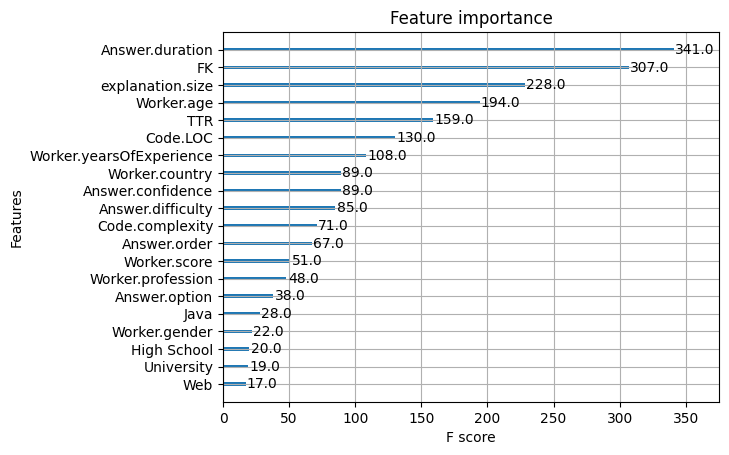

In [282]:
# input parameter importance
plot_importance(best_estimator, max_num_features=20)

## Evaluate Model

In [283]:
from sklearn.metrics import precision_score, recall_score
# evalute precision and recall for all bug reports
for bug_report in train_set.loc[:, "FailingMethod"].unique():
    train_set_for_report = train_set.loc[train_set["FailingMethod"] == bug_report]
    X_for_report = train_set_for_report.drop(["GroundTruth", "FailingMethod"], axis=1)
    y_for_report = train_set_for_report["GroundTruth"]
    train_predictions_for_report = best_estimator.predict(X_for_report)
    print(f"samples for {bug_report}: {len(train_predictions_for_report)}")
    print(f"train precision for {bug_report}: {precision_score(y_for_report, train_predictions_for_report)}")
    print(f"train recall for {bug_report}: {recall_score(y_for_report, train_predictions_for_report)}")
    print(f"train accuracy for {bug_report}: {best_estimator.score(X_for_report, y_for_report)}")

samples for 2: 340
train precision for 2: 0.9876543209876543
train recall for 2: 1.0
train accuracy for 2: 0.9970588235294118
samples for 3: 740
train precision for 3: 1.0
train recall for 3: 1.0
train accuracy for 3: 1.0
samples for 4: 180
train precision for 4: 0.9836065573770492
train recall for 4: 1.0
train accuracy for 4: 0.9944444444444445
samples for 5: 360
train precision for 5: 0.9836065573770492
train recall for 5: 1.0
train accuracy for 5: 0.9972222222222222
samples for 6: 160
train precision for 6: 0.9836065573770492
train recall for 6: 1.0
train accuracy for 6: 0.99375
samples for 7: 480
train precision for 7: 1.0
train recall for 7: 1.0
train accuracy for 7: 1.0


In [284]:
# same for test set
for bug_report in test_set.loc[:, "FailingMethod"].unique():
    test_set_for_report = test_set.loc[test_set["FailingMethod"] == bug_report]
    X_for_report = test_set_for_report.drop(["GroundTruth", "FailingMethod"], axis=1)
    y_for_report = test_set_for_report["GroundTruth"]
    test_predictions_for_report = best_estimator.predict(X_for_report)
    print(f"test precision for {bug_report}: {precision_score(y_for_report, test_predictions_for_report)}")
    print(f"test recall for {bug_report}: {recall_score(y_for_report, test_predictions_for_report)}")
    print(f"test accuracy for {bug_report}: {best_estimator.score(X_for_report, y_for_report)}")
    print(f"true positives for {bug_report}: {sum((y_for_report==1) & (test_predictions_for_report==1))}")
    print(f"false positives for {bug_report}: {sum((y_for_report==0) & (test_predictions_for_report==1))}")
    print(f"false negatives for {bug_report}: {sum((y_for_report==1) & (test_predictions_for_report==0))}")
    print(f"true negatives for {bug_report}: {sum((y_for_report==0) & (test_predictions_for_report==0))}")

test precision for 0: 0.25
test recall for 0: 0.15
test accuracy for 0: 0.74
true positives for 0: 6
false positives for 0: 18
false negatives for 0: 34
true negatives for 0: 142
test precision for 1: 0.9090909090909091
test recall for 1: 0.25
test accuracy for 1: 0.7416666666666667
true positives for 1: 10
false positives for 1: 1
false negatives for 1: 30
true negatives for 1: 79


In [285]:
~(y_for_report == 1)

200    False
201    False
202    False
203    False
204    False
       ...  
315     True
316     True
317     True
318     True
319     True
Name: GroundTruth, Length: 120, dtype: bool

### For the inspection tasks (rows) that host the bug, show the distribution of correct labels by explanation size and complexity. 

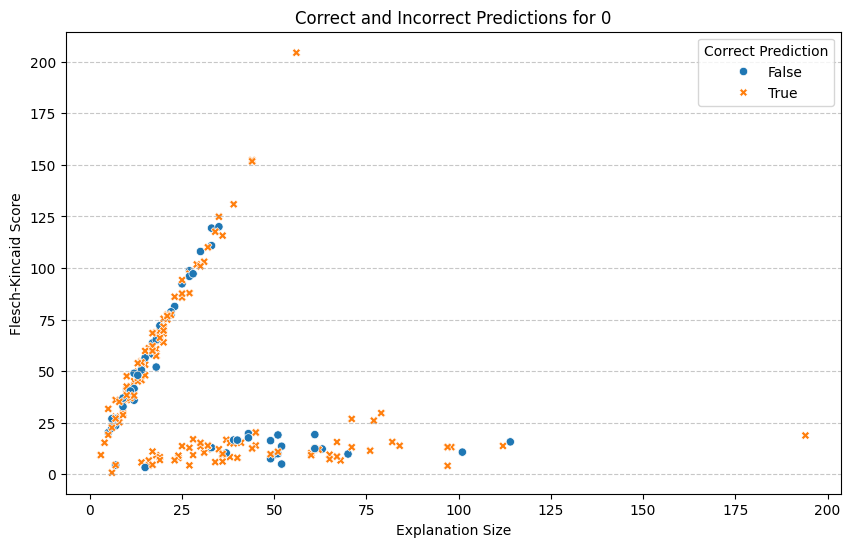

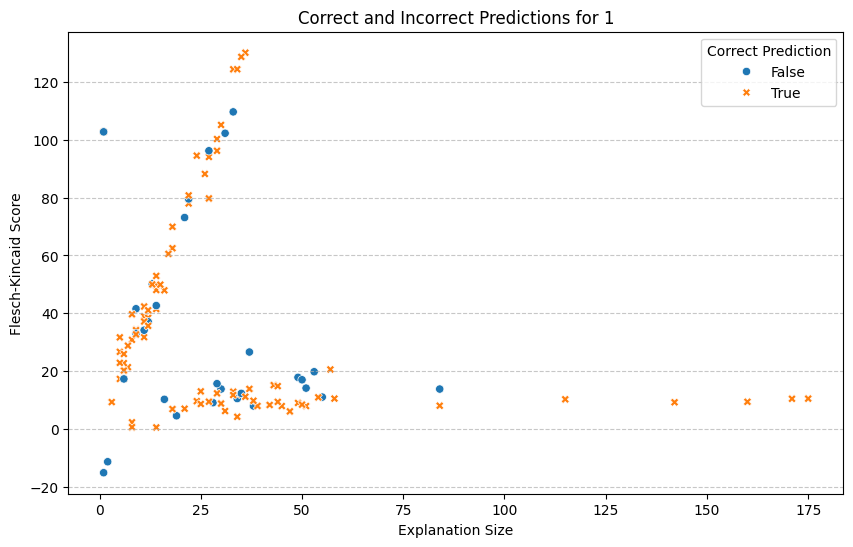

In [286]:
# For the inspection tasks (rows) that host the bug, show the distribution of correct labels by
# explanation size and complexity. 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

bug_reports = list(set(combined_data["FailingMethod"]))

for bug_report in test_set.loc[:, "FailingMethod"].unique():
    bug_data = test_set.loc[test_set["FailingMethod"] == bug_report]
    correct_labels = best_estimator.predict(bug_data.drop(["GroundTruth", "FailingMethod"], axis=1)) == bug_data["GroundTruth"]

    # bin_edges = np.linspace(0, 1, 20)  # 10 bins from 0 to 1
    # bug_data['TTR_bin'] = pd.cut(bug_data['TTR'], bins=bin_edges)
    # bin_stats = bug_data.groupby('TTR_bin')['correct'].mean()

    # plt.figure(figsize=(10, 6))
    # bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    # plt.bar(bin_centers, bin_stats, width=np.diff(bin_edges)[0], edgecolor='k', alpha=0.7)

    # plt.xlabel('TTR Value Bins')
    # plt.ylabel('Percentage of Correct Predictions (%)')
    # plt.title('Percentage of Correct Predictions by TTR Value')
    # plt.xticks(bin_edges, rotation=45)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.show()

    # different marker for correct and incorrect
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='explanation.size', y='FK', data=bug_data, hue=correct_labels, style=correct_labels)
    plt.xlabel('Explanation Size')
    plt.ylabel('Flesch-Kincaid Score')
    plt.legend(title='Correct Prediction')
    plt.title(f'Correct and Incorrect Predictions for {bug_report}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    

    #sns.kdeplot(x='explanation.size', y='TTR', data=bug_data, hue=correct_labels, fill=True, alpha=0.5)

    plt.show()

